In [ ]:
# myimage="image.png"

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import DictionaryLearning


In [3]:
def compress(img_path, n_components):
  # Load an example image
  china = plt.imread(img_path)

  # Convert the image to grayscale
  china = np.mean(china, axis=2)

  # Reshape the image data
  data = china.reshape((len(china), -1))

  # Set the number of components (atoms in the dictionary)
  # n_components = 5

  # Create a DictionaryLearning model
  model = DictionaryLearning(n_components=n_components, transform_algorithm='lasso_cd', random_state=42)

  # Fit the model to the data
  model.fit(data)

  # Transform the data using the learned dictionary
  compressed_data = model.transform(data)

  # Reconstruct the data from the compressed representation
  reconstructed_data = np.dot(compressed_data, model.components_)

  # Save the original, compressed, and reconstructed images
  plt.imsave("original_image.png", china, cmap=plt.cm.gray)
  plt.imsave("compressed_image.png", reconstructed_data.reshape(china.shape), cmap=plt.cm.gray)

  # Get file sizes
  original_size = os.path.getsize("original_image.png")
  compressed_size = os.path.getsize("compressed_image.png")

  # Display file sizes
  print("Original Image Size:", original_size, "bytes")
  print("Compressed Image Size:", compressed_size, "bytes")

  # Calculate compression ratio
  compression_ratio = compressed_size / original_size
  print("Compression Ratio:", compression_ratio)


  # Display the original and reconstructed images
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(china, cmap='gray')

  plt.subplot(1, 2, 2)
  plt.title(f"Reconstructed Image (CR: {compression_ratio:.2f})")
  plt.imshow(reconstructed_data, cmap='gray')

  plt.tight_layout()
  plt.show()

Original Image Size: 49959 bytes
Compressed Image Size: 41482 bytes
Compression Ratio: 0.8303208631077483


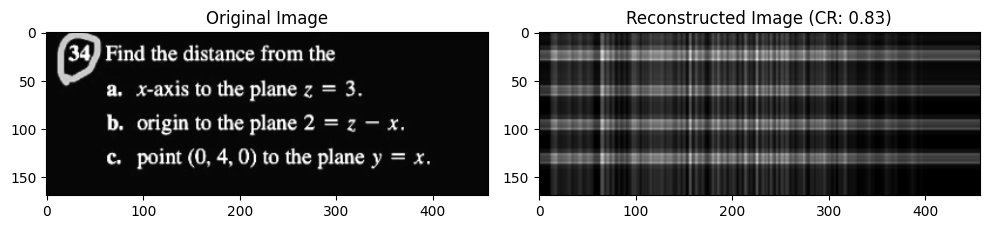

In [8]:
compress('image.png', 1)

Original Image Size: 49959 bytes
Compressed Image Size: 43826 bytes
Compression Ratio: 0.8772393362557297


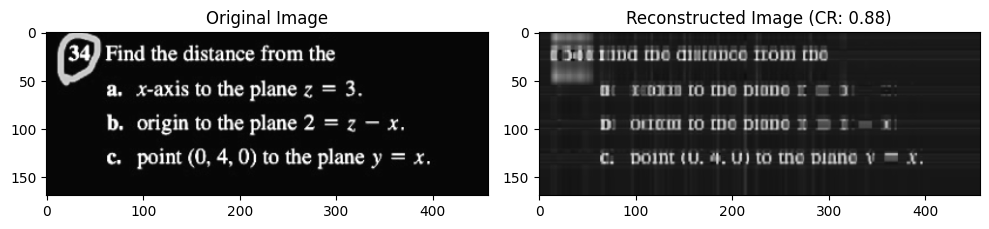

In [4]:
compress('image.png', 10)

Original Image Size: 49959 bytes
Compressed Image Size: 47166 bytes
Compression Ratio: 0.9440941572089113


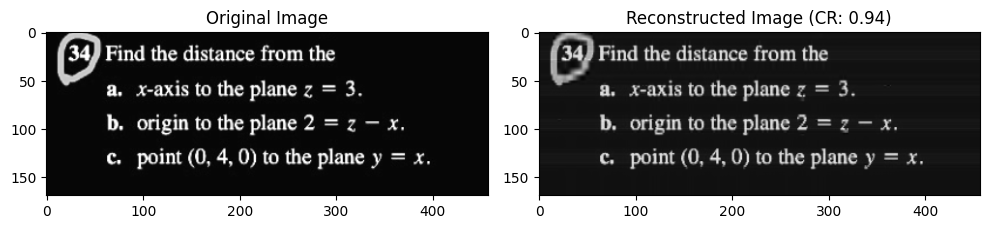

In [5]:
compress('image.png', 50)

/home/alireza/.local/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:639: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.158e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/alireza/.local/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:639: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.579e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/alireza/.local/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:639: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.081e-02, with an active set of 2 regressors, and the smallest 

Original Image Size: 49959 bytes
Compressed Image Size: 47751 bytes
Compression Ratio: 0.9558037590824476


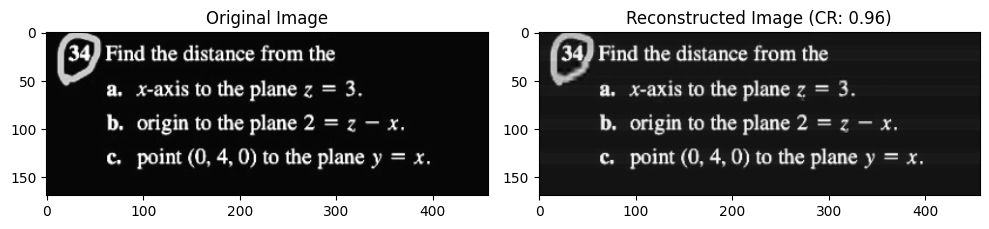

In [7]:
compress('image.png', 80)

In [ ]:
# compress('nature-7.jpg', 10)

KeyboardInterrupt: 